# Wikipedia search

# Get all the data from the wikipedia

In [1]:
import wikipedia
import requests
from bs4 import BeautifulSoup
import random

# Infrmation of the book
author = "Zweig, Stefan"
title = "Jeremias: Eine dramatische Dichtung in neun Bildern"
old_date = 1867 

author = author.replace(",", "")

wikipedia.set_lang("de")

# Search for the possible wiki-websites about the author
search = wikipedia.search(author)
search += wikipedia.search(title)
print(search)

# Function to get the html of the author, for easier usage in the for loop
def gethtml(author, lang = "de"):
    # replace the spaces with the _ so it can be used in the url
    author.replace(" ", "_")
    response = requests.get(
		url="https://" + lang + ".wikipedia.org/wiki/" + author,
	)
    # get the content of the website
    soup = BeautifulSoup(response.content, 'html.parser')
    content = soup.find(id="content").__str__()
    return content

def find_word(content, lang):
    # get the content of the website
    for p in title.split(" "):
        # check if a part of the title is in the content of the website
        if p in content:
            # add the content to the found list
            found[s + lang] = content
            # print the deatils of the search
            # print("Search: " + s + "\nWord in Text: " + p)
            break

# the content of the websites that include a part of the title of the book
found = {}
for s in search:
    # get the content of the website
    # try:
    #     content = wikipedia.page(s).content
    # except:
    lang = "de"
    content = gethtml(s, lang)
    find_word(content, lang)
    lang = "en"
    content = gethtml(s, lang)
    find_word(content, lang)



['Stefan Zweig', 'Stefan Jerzy Zweig', 'Friderike Maria Zweig', 'Sternstunden der Menschheit', 'Brief einer Unbekannten (Film)', 'Maria Stuart (Stefan Zweig)', 'Casa Stefan Zweig', 'Volpone (Stefan Zweig)', 'Brief einer Unbekannten', 'Vor der Morgenröte', 'Stefan Zweig', 'Jeremia', 'Jeremias (Begriffsklärung)', 'Todesfuge', 'Ricarda Huch', 'Francis Quarles']


# Clear the found text of any html

clear the found pages of any html tags

In [5]:
for s in found.keys():
    soup = BeautifulSoup(found[s], 'html.parser')
    found[s] = soup.get_text()

In [ ]:
def clear_text(text):
    # removes the first part if it already starts within a html tag
    if text.find(">") < text.find("<"):
        text = text[text.find(">")+1:]

    html = False
    i = 0
    while i < len(text):
        if text[i] == '<':
            html = True
        # if inside a html tag, remove the character
        if html:
            if text[i] == '>':
                html = False
                text = text[:i] + "  " + text[i+1:]
            else:
                text = text[:i] + text[i+1:]
                i -= 1
        i += 1
    return text

for i in range(0,len(promts)):
    promts[i] = clear_text(promts[i])
    print(promts[i] + "\n")

NameError: name 'promts' is not defined

# Searches for the titel in the pages

searches for the words from the title in the given wikipedia page, and selects the surrounding paragraph and saves it under the promts array

In [9]:
title_clean = "Jeremias dramatische Dichtung Bildern" 

def find_all(content, word):
    n = 0
    while True:
        n = content.find(word, n)
        if n == -1:
            break
        yield n
        n += len(word)

margin = 250
# list to store the found sentences with the title
promts = []
for s in found.keys():
    # look for the position of the title in the content
    places = []
    places.append(-margin*margin)
    for p in title_clean.split(" "):
        for gen in find_all(found[s], p):
            n = gen
            if n == -1:
                continue
            m = min(places, key=lambda x:abs(x-n))
            if m < margin and m > -margin:
                continue
            places.append(n)
            # get the sentence and text around the title
            if n < margin:
                text_to_check = found[s][:n+margin]
            else:
                text_to_check = found[s][n-margin:n+margin]
            info = "Search: " + s + "; Word in Text: " + p
            info += " (" + str(n) + "):\n"
            # info += text_to_check + "\n"
            print(info)
            # add the sentence to the list
            promts.append(text_to_check)

print(len(promts))

Search: Stefan Zweigde; Word in Text: Jeremias (22722):

Search: Stefan Zweigde; Word in Text: Jeremias (59840):

Search: Stefan Zweigde; Word in Text: Jeremias (158179):

Search: Stefan Zweigde; Word in Text: Jeremias (158246):

Search: Stefan Zweigde; Word in Text: Jeremias (158295):

Search: Stefan Zweigde; Word in Text: dramatische (5275):

Search: Stefan Zweigde; Word in Text: dramatische (59855):

Search: Stefan Zweigde; Word in Text: Dichtung (59867):

Search: Stefan Zweigde; Word in Text: Bildern (59884):

Search: Stefan Zweigde; Word in Text: Bildern (63122):

Search: Stefan Zweigde; Word in Text: Bildern (64795):

Search: Stefan Zweigde; Word in Text: Bildern (115739):

Search: Stefan Zweigen; Word in Text: Jeremias (192445):

Search: Stefan Zweigen; Word in Text: Jeremias (192471):

Search: Stefan Zweigen; Word in Text: Jeremias (192490):

Search: Stefan Jerzy Zweigde; Word in Text: Bildern (15415):

Search: Stefan Jerzy Zweigde; Word in Text: Bildern (17149):

Search: Stefa

searches for the words from the title in the given wikipedia page, and selects the surrounding paragraph and saves it under the promts array, and saves only the pragraph shown separated by \n

selects only one row containing the tile

In [2]:
for ip in range(0,len(promts)):
    enters = []
    print(promts[ip])
    for i in range(0, len(promts[ip])):
       c = promts[ip][i]
       if c == '\n':
           enters.append(i)
    print(enters)

    promt_new = ''
    if len(enters) > 1:
       first_index = min(enters, key=lambda x:abs(x-margin))
       if first_index <= 250:
           if enters.index(first_index) < (len(enters) - 1):
               promt_new = promts[ip][first_index:enters[enters.index(first_index) + 1]]
           else:
               promt_new = promts[ip][first_index:]
       elif first_index >= 250:
           if enters.index(first_index) > 0:
               promt_new = promts[ip][enters[enters.index(first_index) - 1]:first_index]
           else:
               promt_new = promts[ip][:first_index]

    print(repr(promt_new))
    promts[ip] = promt_new

NameError: name 'promts' is not defined

searches for the title in the given wikipedia page, and selects the surrounding paragraph and saves it under the promts array

In [3]:
import re

def find_all(content, word):
    n = 0
    pattern = re.compile(r'{}'.format(word), re.IGNORECASE)
    while True:
        match = pattern.search(content[n:])
        if not match:
            break
        n = match.start()
        yield n
        n += len(word)

margin = 250
# list to store the found sentences with the title
promts = []
for s in found.keys():
    # look for the position of the title in the content
    places = []
    places.append(-margin*margin)
    for gen in find_all(found[s], title):
        n = gen
        if n == -1:
            continue
        m = min(places, key=lambda x:abs(x-n))
        if m < margin and m > -margin:
            continue
        places.append(n)
        # get the sentence and text around the title
        if n < margin:
            text_to_check = found[s][:n+margin]
        else:
            text_to_check = found[s][n-margin:n+margin]
        info = "Search: " + s + "; Word in Text: " + title
        info += " (" + str(n) + "):\n"
        info += text_to_check + "\n"
        print(info)
        # add the sentence to the list
        promts.append(text_to_check)

print(len(promts))

0


# The model that searches for the year in the found sentences

loading the model

In [4]:
model_id = 'textminr/ner-multilingual-bert'

from transformers import pipeline
classifier = pipeline(
  'ner',
  model=model_id,
  aggregation_strategy='simple'
)

/home/mmatic/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-13 10:45:57.496097: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 10:45:57.579827: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 10:45:57.615647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 10:45:57.691485: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Un

using the model

In [10]:
import re
import pandas as pd

def find_title(content, word):
    pattern = re.compile(r'{}'.format(word), re.IGNORECASE)
    match = pattern.search(content)
    if match:
        return [match.start(), match.end()]
    return [None, None]

def date_to_df(dates):
    # date_entities_df
    de_df = pd.DataFrame(dates)

    de_df['score'] = pd.to_numeric(de_df['score'])
    de_df['start'] = pd.to_numeric(de_df['start'])
    de_df['end'] = pd.to_numeric(de_df['end'])

    de_df['word'] = pd.to_numeric(de_df['word'], errors='coerce')
    de_df = de_df.dropna(subset=['word'])
    de_df['word'] = de_df['word'].astype(int)

    return de_df

def find_before(dates, start, ends):
    if len(ends) == 0:
        return -1
    ends.sort()
    lastend = ends[0]
    for e in ends:
        if e < start and e >= lastend:
            lastend = e
        break
    date_entities.loc[date_entities.count()['word']] = dates_df[dates_df['end'] == lastend].iloc[0]
    return lastend

def find_after(dates, start, ends, lastend):
    if len(ends) == 0:
        return
    starts.sort()
    laststart = starts[len(starts)-1]
    for s in starts:
        if s > year_end and s <= laststart:
            laststart = s
        break
    if dates_df[dates_df['start'] == laststart].iloc[0]['end'] == lastend:
        index = starts.index(laststart)
        if index < (len(starts) - 1):
            laststart = starts[index+1]
        elif index > 0:
            laststart = starts[index-1]
        else:
            return
    date_entities.loc[date_entities.count()['word']] = dates_df[dates_df['start'] == laststart].iloc[0]

responses = []
df = []
date_entities = pd.DataFrame(columns=['entity_group', 'score', 'word', 'start', 'end'])
for i in range(len(promts)):
    year_start, year_end = find_title(promts[i], title)
    print(str(i) + ":", year_start, year_end)
    ends, starts = [], []
    
    dates = []
    # model looks for the correct date in the text
    responses.append(classifier(promts[i]))
    # only the dates are printed, because the model also looks for other entities
    for r in responses[i]:
       print(r)
       if r['entity_group'] == 'DATE':
          starts.append(r['start'])
          ends.append(r['end'])
          dates.append(r)
          df.append(r)
    if len(dates) != 0:
        dates_df = date_to_df(dates)
    # lastend = find_before(dates, start, ends)
    # find_after(dates, end, starts, lastend)
len(responses)

0: None None
{'entity_group': 'DATE', 'score': 0.9944834, 'word': '1917', 'start': 130, 'end': 134}
1: None None
{'entity_group': 'DATE', 'score': 0.9882825, 'word': '1911', 'start': 10, 'end': 14}
{'entity_group': 'DATE', 'score': 0.9962269, 'word': '1912', 'start': 91, 'end': 95}
{'entity_group': 'DATE', 'score': 0.99250996, 'word': '1913', 'start': 167, 'end': 171}
{'entity_group': 'AUTHOR', 'score': 0.99136704, 'word': 'Max Brod', 'start': 183, 'end': 191}
{'entity_group': 'AUTHOR', 'score': 0.7661052, 'word': 'Kurt Wolff', 'start': 225, 'end': 235}
{'entity_group': 'AUTHOR', 'score': 0.9763193, 'word': 'Frans Masereel', 'start': 447, 'end': 461}
{'entity_group': 'DATE', 'score': 0.94806725, 'word': '1918', 'start': 479, 'end': 483}
2: None None
{'entity_group': 'AUTHOR', 'score': 0.59874636, 'word': 'Claris', 'start': 171, 'end': 177}
{'entity_group': 'AUTHOR', 'score': 0.6292459, 'word': 'Dickens', 'start': 452, 'end': 459}
3: None None
4: None None
{'entity_group': 'DATE', 'scor

94

find datees with a for loop

In [11]:
def find_title(content, word):
    for w in word.split(" "):
        pattern = re.compile(r'{}'.format(w), re.IGNORECASE)
        match = pattern.search(content)
        if match:
            return [match.start(), match.end()]
        return [None, None]

def find_dates(text: str):
    title_start, title_end = find_title(text, title_clean)

    years = pd.DataFrame(columns=['word', 'start', 'end', 'distance'])
    n = 0
    year_start, year_end = 0, 0
    year = ""
    for i in range(0, len(text)):
        c = text[i]
        if c.isnumeric():
            if n == 0:
                year_start = i
            n += 1
            year += c
        else:
            if n != 0 and n <= 4:
                year_end = i
                try:
                    year = int(year)

                    dis1, dis2, dis3, dis4 = year_start - title_start, year_start - title_end, year_end - title_start, year_end - title_end
                    dis = min(abs(dis1), abs(dis2), abs(dis3), abs(dis4))

                    years = years._append({'word': year, 'start': year_start, 'end': year_end, 'distance': dis}, ignore_index=True)
                    if dis == 1:
                        print(repr(promts[i]))
                except:
                    print("could not parse")
            n = 0
            year = ""
    return years

df = pd.DataFrame(columns=['word', 'start', 'end', 'distance'])
responses = []
length = 0
for i in range(len(promts)):
    title_start, title_end = find_title(promts[i], title_clean)
    print(str(i) + ":", title_start, title_end)

    responses.append(find_dates(promts[i]))
    print(responses[i])

    length += len(responses)
    if title_start == None or title_end == None:
        continue
    for j in range(0,len(responses[i])):
        year_start = responses[i].loc[j, 'start']
        year_end = responses[i].loc[j, 'end']
        dis1, dis2, dis3, dis4 = year_start - title_start, year_start - title_end, year_end - title_start, year_end - title_end
        dis = min(abs(dis1), abs(dis2), abs(dis3), abs(dis4))
        df = df._append({'word': responses[i].loc[j, 'word'], 'start': year_start, 'end': year_end, 'distance': dis}, ignore_index=True)
        if dis == 1:
            print(repr(promts[i]))

print(length)

0: 250 258
   word start  end distance
0    15   123  125      125
1  1917   130  134      116
1: 250 258
could not parse
   word start  end distance
0  1911    10   14      236
1  1912    91   95      155
2  1913   167  171       79
3  1915   245  249        1
4  1917   318  322       60
5  1917   368  372      110
6  1918   479  483      221
', Leipzig 1911\nDas Haus am Meer. Ein Schauspiel in zwei Teilen. (In drei Aufzügen) Leipzig 1912\nDer verwandelte Komödiant. Ein Spiel aus dem deutschen Rokoko. Leipzig 1913\nVorwort zu Max Brods Roman Tycho Brahes Weg zu Gott. Kurt Wolff, Leipzig 1915\nJeremias. Eine dramatische Dichtung in neun Bildern. Insel, Leipzig 1917\nErinnerungen an Emile Verhaeren, Privatdruck 1917\nDas Herz Europas. Ein Besuch im Genfer Roten Kreuz. Umschlagzeichnung von Frans Masereel, Rascher, Zürich 1918\nLegende eines Le'
2: 250 258
Empty DataFrame
Columns: [word, start, end, distance]
Index: []
3: None None
Empty DataFrame
Columns: [word, start, end, distance]
In

In [12]:
print(df)

     word start  end distance
0      15   123  125      125
1    1917   130  134      116
2    1911    10   14      236
3    1912    91   95      155
4    1913   167  171       79
..    ...   ...  ...      ...
266  1904   242  246        4
267  1917   307  311       49
268    19    41   43      207
269  1648     5    9      241
270  1620   316  320       58

[271 rows x 4 columns]


data of the Book. The Birth and Death year of the Author.

In [13]:
birth = 1800
death = 1950
date_entities = df
print(date_entities.head())
date_entities.size

   word start  end distance
0    15   123  125      125
1  1917   130  134      116
2  1911    10   14      236
3  1912    91   95      155
4  1913   167  171       79


1084

In [14]:
date_entities = date_entities[(date_entities.word >= birth) & (date_entities.word <= death)]
average_scores = date_entities.groupby('word')['distance'].mean().reset_index()

# Rename columns for clarity
average_scores.columns = ['year', 'average_score']
average_scores = pd.DataFrame(average_scores)

year_counts = date_entities.groupby('word').count().reset_index()[['word', 'distance']]
year_counts.columns = ['year', 'count']

average_scores = pd.merge(average_scores, year_counts, on='year')

print(average_scores)

date_entities.head()

    year average_score  count
0   1863         122.0      1
1   1870         134.0      1
2   1901          68.0      1
3   1902         139.0      1
4   1904           4.0      1
5   1911         236.0      1
6   1912         155.0      1
7   1913          98.0      2
8   1914          69.0      1
9   1915           1.0      1
10  1917        105.75      8
11  1918         221.0      1
12  1922         224.0      1
13  1937         121.5      2
14  1938     55.333333      3
15  1942         106.0      1
16  1943         177.0      1


,word,start,end,distance
1,1917,130,134,116
2,1911,10,14,236
3,1912,91,95,155
4,1913,167,171,79
5,1915,245,249,1


In [15]:
average_scores.loc[average_scores['year'] == 1911]

,year,average_score,count
5,1911,236.0,1


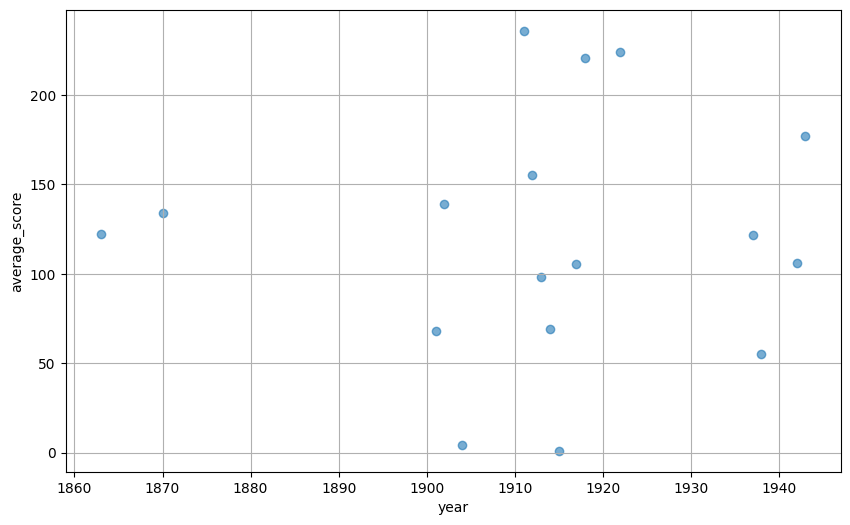

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(average_scores['year'], average_scores['average_score'], alpha=0.6)

plt.xlabel("year")
plt.ylabel("average_score")
plt.grid(True)

plt.show()

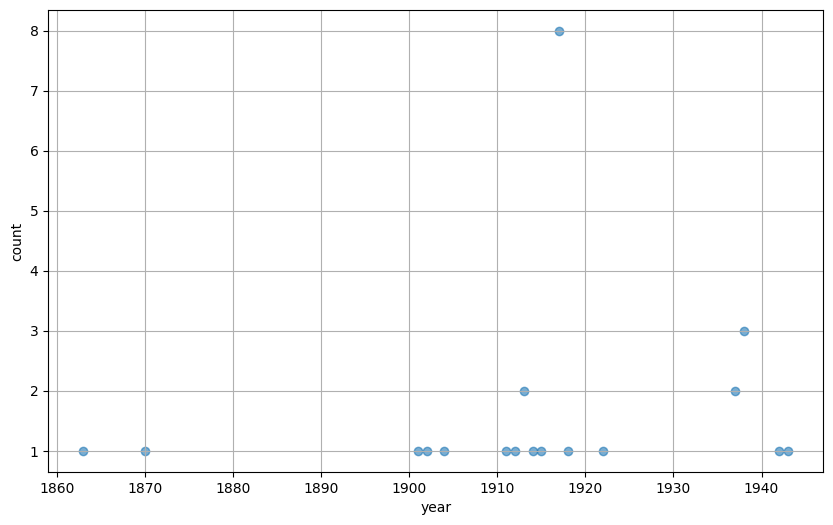

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(average_scores['year'], average_scores['count'], alpha=0.6)

plt.xlabel("year")
plt.ylabel("count")
plt.grid(True)

plt.show()

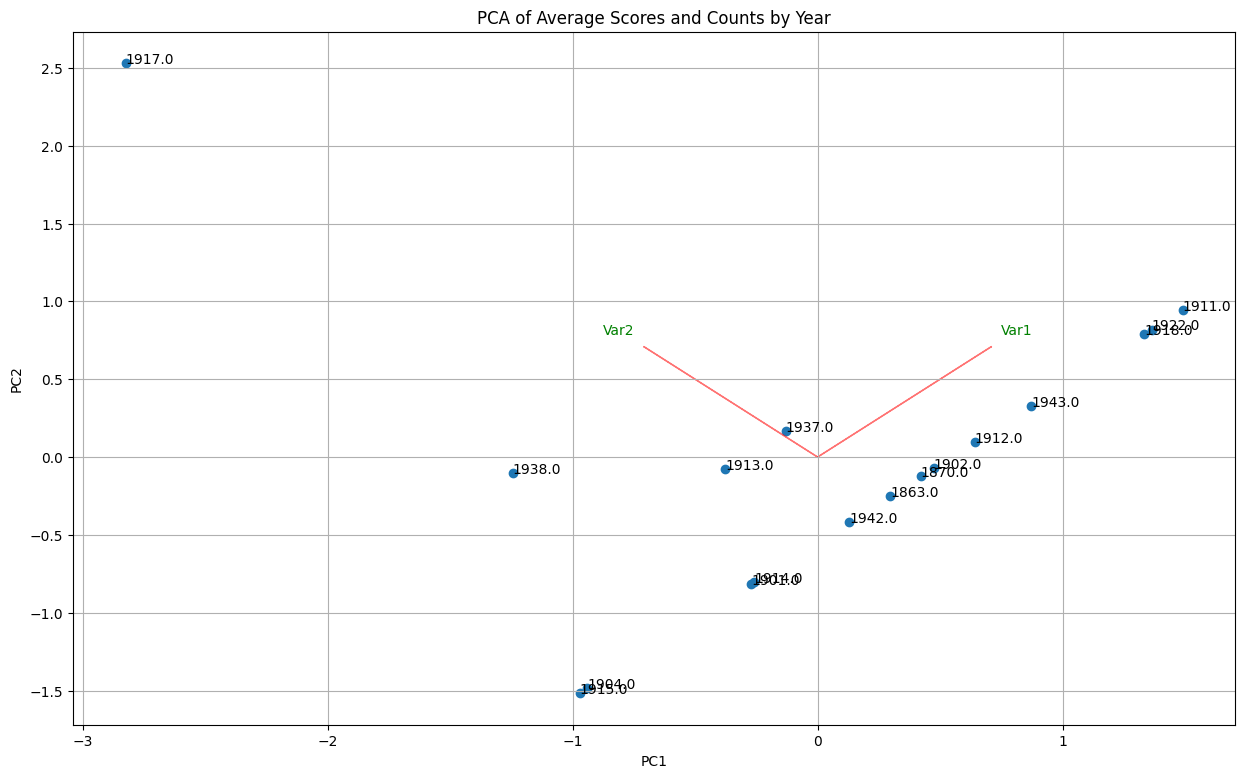

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = ['average_score', 'count']
x = average_scores[features]
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df = pd.concat([pca_df, average_scores[['year']]], axis=1)

plt.figure(figsize=(15, 9))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.title('PCA of Average Scores and Counts by Year')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(principal_components[:,0:2],np.transpose(pca.components_[0:2, :]))

for i, row in pca_df.iterrows():
    plt.annotate(row['year'], (row['Principal Component 1'], row['Principal Component 2']))

plt.show()


calculate one most probable year

In [25]:
# principal_components
# print(pca.explained_variance_ratio_)
v1, v2 = pca.explained_variance_ratio_
print(v1, v2)
calcs = {}
for i in average_scores.iterrows():
    # 1915: 0.99 (score) + 0.13 (count) = 1.12
    count = i[1]['count']/average_scores.max()['count']
    calc_score = v1/i[1]['average_score']
    calc_count = count * v2
    calc = (calc_score + calc_count)/2
    print(i[1]['year'],  calc_score, '(score' , str(round(i[1]['average_score'])) + ')', calc_count, '(count', str(round(i[1]['count'])) + ') =', calc)
    calcs[i[1]['year']] = calc
print()
win = max(calcs, key=calcs.get)
print(win, calcs[win])

dict(sorted(calcs.items(), key=lambda item: item[1]))

0.5642085692273143 0.43579143077268556
1863 0.004624660403502576 (score 122) 0.054473928846585695 (count 1) = 0.029549294625044135
1870 0.004210511710651599 (score 134) 0.054473928846585695 (count 1) = 0.029342220278618648
1901 0.008297184841578152 (score 68) 0.054473928846585695 (count 1) = 0.031385556844081924
1902 0.004059054454872765 (score 139) 0.054473928846585695 (count 1) = 0.02926649165072923
1904 0.14105214230682858 (score 4) 0.054473928846585695 (count 1) = 0.09776303557670714
1911 0.002390714276386925 (score 236) 0.054473928846585695 (count 1) = 0.02843232156148631
1912 0.003640055285337512 (score 155) 0.054473928846585695 (count 1) = 0.029056992065961604
1913 0.005757230298237902 (score 98) 0.10894785769317139 (count 2) = 0.05735254399570465
1914 0.008176935785903106 (score 69) 0.054473928846585695 (count 1) = 0.0313254323162444
1915 0.5642085692273143 (score 1) 0.054473928846585695 (count 1) = 0.30934124903695004
1917 0.005335305619170821 (score 106) 0.43579143077268556 (

{1911: 0.02843232156148631,
 1922: 0.02849635855103239,
 1918: 0.028513454398920255,
 1943: 0.02883077394088413,
 1912: 0.029056992065961604,
 1902: 0.02926649165072923,
 1870: 0.029342220278618648,
 1863: 0.029549294625044135,
 1942: 0.029898325598893386,
 1914: 0.0313254323162444,
 1901: 0.031385556844081924,
 1937: 0.05679577481048411,
 1913: 0.05735254399570465,
 1938: 0.08680916347373982,
 1904: 0.09776303557670714,
 1917: 0.2205633681959282,
 1915: 0.30934124903695004}

# Show the count of the occurances

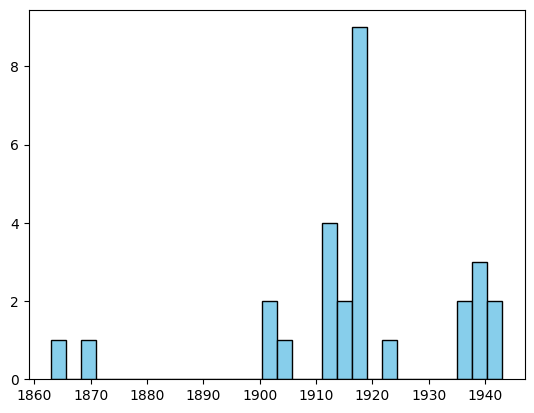

In [26]:
import matplotlib.pyplot as plt

df = df[(df.word >= birth) & (df.word <= death)]

plt.hist(df['word'], bins=30, color='skyblue', edgecolor='black')
plt.show()

In [27]:
df.head()

,word,start,end,distance
1,1917,130,134,116
2,1911,10,14,236
3,1912,91,95,155
4,1913,167,171,79
5,1915,245,249,1


# Analyse the data with the whole set, without counting the occurances

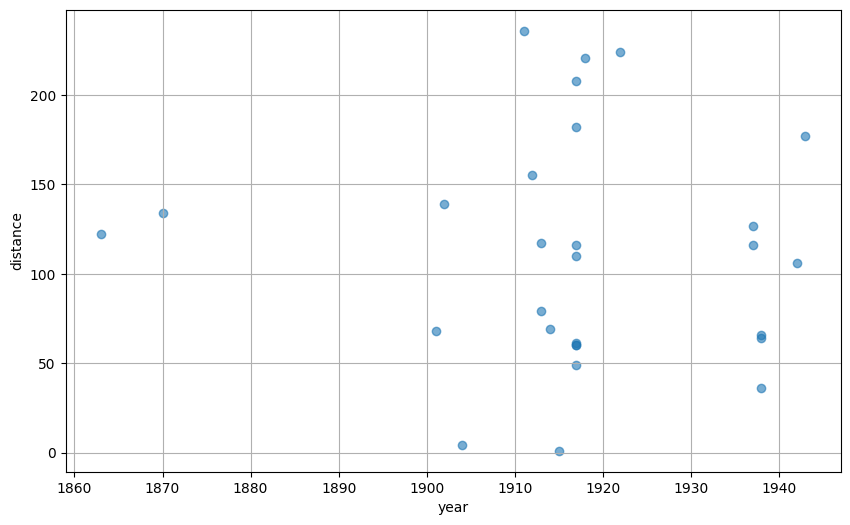

In [28]:
import matplotlib.pyplot as plt

df = df[(df.word >= birth) & (df.word <= death)]
plt.figure(figsize=(10,6))

plt.scatter(df['word'], df['distance'], alpha=0.6)

plt.xlabel("year")
plt.ylabel("distance")
plt.grid(True)

plt.show()

In [29]:
df['distance'] = pd.to_numeric(df['distance'])

In [30]:
print(df.sort_values(by='distance')[0:10])

     word start  end  distance
5    1915   245  249         1
266  1904   242  246         4
219  1938   210  214        36
267  1917   307  311        49
220  1917   318  322        60
6    1917   318  322        60
143  1917   319  323        61
147  1938   322  326        64
206  1938   324  328        66
127  1901   178  182        68


In [31]:
df_winners = df.sort_values(by='distance')[0:10].groupby('word')['distance'].mean().reset_index()

# Rename columns for clarity
df_winners.columns = ['year', 'average_distance']
df_winners = pd.DataFrame(df_winners)

df_year_counts = df.sort_values(by='distance')[0:10].groupby('word').count().reset_index()[['word', 'distance']]
df_year_counts.columns = ['year', 'count']

df_winners = pd.merge(df_winners, df_year_counts, on='year')

df_winners

,year,average_distance,count
0,1901,68.000000,1
1,1904,4.000000,1
2,1915,1.000000,1
3,1917,57.500000,4
4,1938,55.333333,3


In [32]:
# principal_components
# print(pca.explained_variance_ratio_)
calcs = {}
for i in df_winners.iterrows():
    # 1915: 0.99 (score) + 0.13 (count) = 1.12
    calc_count = (i[1]['count'] - df_winners.min()['count'])/(df_winners.max()['count'] - df_winners.min()['count'])
    calc_dist = 1 - (i[1]['average_distance'] - df_winners.min()['average_distance'])/(df_winners.max()['average_distance'] - df_winners.min()['average_distance'])
    calc = (calc_dist + calc_count)/2
    print(i[1]['year'],  calc_dist, '(dist' , str(round(i[1]['average_distance'])) + ')', calc_count, '(count', str(round(i[1]['count'])) + ') =', calc)
    calcs[i[1]['year']] = calc
print()
win = max(calcs, key=calcs.get)
print(win, calcs[win])

dict(sorted(calcs.items(), key=lambda item: item[1]))

1901.0 0.0 (dist 68) 0.0 (count 1) = 0.0
1904.0 0.9552238805970149 (dist 4) 0.0 (count 1) = 0.47761194029850745
1915.0 1.0 (dist 1) 0.0 (count 1) = 0.5
1917.0 0.15671641791044777 (dist 58) 1.0 (count 4) = 0.5783582089552239
1938.0 0.18905472636815912 (dist 55) 0.6666666666666666 (count 3) = 0.4278606965174129

1917.0 0.5783582089552239


{1901.0: 0.0,
 1938.0: 0.4278606965174129,
 1904.0: 0.47761194029850745,
 1915.0: 0.5,
 1917.0: 0.5783582089552239}